
## Описание проекта

Вы побывали на конференции, посвящённой развитию игровой индустрии. Под впечатлением от увиденного решили создать свой проект и вывести его на рынок. За что взяться в первую очередь?
Лучше всего начать с исследования опыта известных платформ и игр. Есть информация об играх и продажах в Европе (EU), Северной Америке (NA) и России (RU). Изучите данные, ответьте на вопросы и решите, какую игру следует разработать.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Инструкция по выполнению проекта

### Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу:

/datasets/games.csv

/datasets/rating.csv — данные о рейтинге ESRB

### Шаг 2. Подготовьте данные
* Замените названия столбцов.
* Посчитайте количество продаж во всех регионах и запишите в отдельный столбец.
* Приведите данные к нужным типам:
* Опишите, в каких столбцах пришлось заменить тип данных и почему
* Обработайте пропуски при необходимости:
* Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
* Опишите возможные причины возникновения пропусков

### Шаг 3. Проведите исследовательский анализ данных
* Постройте распределение по годам релиза и опишите полученный результат
* Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
* Постройте график продаж по каждому году; сделайте вывод
* Постройте ящик с усами по глобальным продажам, опишите полученный результат
* Узнайте, на какой платформе было выпущено больше всего игр
* Определите, игр какого жанра больше всего
* Найдите игры с наибольшей и наименьшей оценкой от пользователей
* Найдите игры с наибольшей и наименьшей оценкой от критиков
* Оцените корреляцию между оценками критиков и пользовательскими оценками.

### Шаг 4. Составьте портрет пользователя для каждого региона
* Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
    * топ-5 предпочтительных жанров
    * в какие года пользователи были наиболее активны (больше всего покупали игры)
    * топ-5 предпочтительных платформ
    * какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


### Шаг 5. Проверьте гипотезы:
* средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
* средний пользовательский рейтинг жанров Action и Sports различается.

Пороговое значение alpha задайте самостоятельно.

Поясните:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.


### Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год релиза

Genre — жанр игры

NA_players — продажи игрокам в Северной Америке (в миллионах долларов)

EU_players — продажи игрокам в Европе (в миллионах долларов)

RU_players — продажи игрокам в России (в миллионах долларов)

Other_players — продажи игрокам в других странах

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг ESRB

## Оглавление <a class="anchor" id="7"></a>
* [Шаг 1. Откройте файл с данными и изучите общую информацию](#1)
* [Шаг 2. Подготовьте данные](#2)
* [Шаг 3. Проведите исследовательский анализ данных](#3)
* [Шаг 4. Составьте портрет пользователя для каждого региона](#4)
* [Шаг 5. Проверьте гипотезы](#5)
* [Итог проекта](#6)

# Шаг 1. Откройте файл с данными и изучите общую информацию <a class="anchor" id="1"></a>


Загрузим необходимые библиотеки. Затем откроем и прочтем файл с данными

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import math
import seaborn as sns
import matplotlib as plt

In [2]:
games = pd.read_csv('/datasets/games.csv')
rating = pd.read_csv('/datasets/rating.csv')

Посмотрим данные двух датафреймов

In [3]:
games.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_players  EU_players  RU_players  Other_players  Critic_Score User_Score  \
0       41.36       28.96        3.77           8.45          76.0          8   
1       29.08        3.58        6.81           0.77           NaN        NaN   
2       15.68       12.76        3.79           3.29          82.0        8.3   
3       15.61       10.93        3.28           2.95          80.0          8   
4       11.27        8.89       10.22           1.00           NaN        NaN   
5       23.20        2.26        4.22           0.58           NaN        NaN   
6       11.28        9.14        6.50           2.88          89.0        8.5   
7       13.96        9.18        2.93           2.84          58.0        6.6   
8       14.44        6.94        4.70           2.24          87.0        8.4   
9       26.93        0.63        0.28           0.47           NaN        NaN   

  Rating  
0      E  
1    NaN  
2      E  
3      E  
4    NaN  
5    NaN  
6      E  
7      E  
8      E  
9    NaN

In [4]:
rating.head(10)

rating_type                   decryption
0           E                     Для всех
1           M                    От 17 лет
2           T         Подросткам 13—19 лет
3        E10+       Для всех старше 10 лет
4         K-A       Для всех(до 1998 года)
5          AO          Только для взрослых
6          EC  Для детей младшего возраста
7          RP            Рейтинг ожидается

Посмотрим тип данных и пропуски

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


In [7]:
games.isnull().sum().sort_values(ascending = False)

Critic_Score       8582
Rating             6769
User_Score         6704
Year_of_Release     269
Genre                 2
Name                  2
Other_players         0
RU_players            0
EU_players            0
NA_players            0
Platform              0
dtype: int64

Посмотрим на наличие дубликатов

In [8]:
games.duplicated().sum()

0

In [9]:
rating.duplicated().sum()

0

Дубликатов нет. Отлично!

In [10]:
games.describe(include = 'object')

Name Platform   Genre User_Score Rating
count                         16717    16719   16717      10015   9950
unique                        11562       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3370       2425   3991

В поле User_Score обнаружилось значение tbd (to be determined), его надо будет заменить на 0

In [11]:
games.describe()

Year_of_Release    NA_players    EU_players    RU_players  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

       Other_players  Critic_Score  
count   16719.000000   8137.000000  
mean        0.047332     68.967679  
std         0.186710     13.938165  
min         0.000000     13.000000  
25%         0.000000     60.000000  
50%         0.010000     71.000000  
75%         0.030000     79.000000  
max        10.570000     98.000000

## Предварительный итог знакомства с данными
Первый взгляд на данные показал наличие пропусков в полях  Critic_Score, Rating, User_Score, Year_of_Release, Genre и         Name. Причем пропуски в оценке критиков составляют чуть больше половины данных. Также их много в рейтинге и  оценке пользователей. Также обнаружены значения to be determined, которые предстоит заменить на 0. Необходимо будет поменять тип данных (год релиза,  оценка пользователей) и заменить название столбца decryption на description

# Шаг 2. Подготовьте данные  <a class="anchor" id="2"></a>

### Переименуем столбец decryption на description и проверим успешность замены. Также, для удобства, укорочу название года релиза просто до Year.

In [12]:
rating.rename(columns={'decryption':'description'}, inplace=True) 

In [13]:
games.rename(columns={'Year_of_Release': 'Year'}, inplace=True)

In [14]:
rating.head()

rating_type             description
0           E                Для всех
1           M               От 17 лет
2           T    Подросткам 13—19 лет
3        E10+  Для всех старше 10 лет
4         K-A  Для всех(до 1998 года)

In [15]:
games.head()

Name Platform    Year         Genre  NA_players  \
0                Wii Sports      Wii  2006.0        Sports       41.36   
1         Super Mario Bros.      NES  1985.0      Platform       29.08   
2            Mario Kart Wii      Wii  2008.0        Racing       15.68   
3         Wii Sports Resort      Wii  2009.0        Sports       15.61   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing       11.27   

   EU_players  RU_players  Other_players  Critic_Score User_Score Rating  
0       28.96        3.77           8.45          76.0          8      E  
1        3.58        6.81           0.77           NaN        NaN    NaN  
2       12.76        3.79           3.29          82.0        8.3      E  
3       10.93        3.28           2.95          80.0          8      E  
4        8.89       10.22           1.00           NaN        NaN    NaN

Т.к. у нас в данных много пропусков, то перед приведением их к нужному типу данных, попробуем обработать пропуски. Начнем с года релиза. В данном случае замена на средние значения и на медиану не очень нам поможет. Принимая во внимание, что пропусков всего 269 из 16 719, я принимаю решение избавиться от них.

In [16]:
games.dropna(subset = ['Year'], inplace = True)

In [17]:
games.isnull().sum().sort_values(ascending = False)

Critic_Score     8467
Rating           6681
User_Score       6610
Genre               2
Name                2
Other_players       0
RU_players          0
EU_players          0
NA_players          0
Year                0
Platform            0
dtype: int64

### Теперь можно привести тип данных года релиза к целочисленному

In [18]:
games['Year'] = games['Year'].astype('int16')

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 11 columns):
Name             16448 non-null object
Platform         16450 non-null object
Year             16450 non-null int16
Genre            16448 non-null object
NA_players       16450 non-null float64
EU_players       16450 non-null float64
RU_players       16450 non-null float64
Other_players    16450 non-null float64
Critic_Score     7983 non-null float64
User_Score       9840 non-null object
Rating           9769 non-null object
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


### Посчитайте количество продаж во всех регионах и запишите в отдельный столбец.


Сложим данные по продажам во всех регионах и запишем в новый столбец total_players

In [20]:

games['Total_players'] = games.NA_players + games.EU_players + games.RU_players + games.Other_players

In [21]:
games.head(10)

Name Platform  Year         Genre  NA_players  \
0                 Wii Sports      Wii  2006        Sports       41.36   
1          Super Mario Bros.      NES  1985      Platform       29.08   
2             Mario Kart Wii      Wii  2008        Racing       15.68   
3          Wii Sports Resort      Wii  2009        Sports       15.61   
4   Pokemon Red/Pokemon Blue       GB  1996  Role-Playing       11.27   
5                     Tetris       GB  1989        Puzzle       23.20   
6      New Super Mario Bros.       DS  2006      Platform       11.28   
7                   Wii Play      Wii  2006          Misc       13.96   
8  New Super Mario Bros. Wii      Wii  2009      Platform       14.44   
9                  Duck Hunt      NES  1984       Shooter       26.93   

   EU_players  RU_players  Other_players  Critic_Score User_Score Rating  \
0       28.96        3.77           8.45          76.0          8      E   
1        3.58        6.81           0.77           NaN        NaN    NaN   
2       12.76        3.79           3.29          82.0        8.3      E   
3       10.93        3.28           2.95          80.0          8      E   
4        8.89       10.22           1.00           NaN        NaN    NaN   
5        2.26        4.22           0.58           NaN        NaN    NaN   
6        9.14        6.50           2.88          89.0        8.5      E   
7        9.18        2.93           2.84          58.0        6.6      E   
8        6.94        4.70           2.24          87.0        8.4      E   
9        0.63        0.28           0.47           NaN        NaN    NaN   

   Total_players  
0          82.54  
1          40.24  
2          35.52  
3          32.77  
4          31.38  
5          30.26  
6          29.80  
7          28.91  
8          28.32  
9          28.31

### Посмотрим теперь пропуски в стобце Name и Genre. 

In [22]:
games[games['Name'].isna()]

Name Platform  Year Genre  NA_players  EU_players  RU_players  \
659    NaN      GEN  1993   NaN        1.78        0.53        0.00   
14246  NaN      GEN  1993   NaN        0.00        0.00        0.03   

       Other_players  Critic_Score User_Score Rating  Total_players  
659             0.08           NaN        NaN    NaN           2.39  
14246           0.00           NaN        NaN    NaN           0.03

In [23]:
games[games['Genre'].isna()]

Name Platform  Year Genre  NA_players  EU_players  RU_players  \
659    NaN      GEN  1993   NaN        1.78        0.53        0.00   
14246  NaN      GEN  1993   NaN        0.00        0.00        0.03   

       Other_players  Critic_Score User_Score Rating  Total_players  
659             0.08           NaN        NaN    NaN           2.39  
14246           0.00           NaN        NaN    NaN           0.03

Эти строки совпадают, плюс в них  очень много пропусков и в других столбцах. Я считаю, что можно безболезненно от них избавиться.

In [24]:
games.dropna(subset = ['Name'], inplace = True)

In [25]:
games.dropna(subset = ['Genre'], inplace = True)

In [26]:
games.isna().sum().sort_values(ascending = False)

Critic_Score     8465
Rating           6679
User_Score       6608
Total_players       0
Other_players       0
RU_players          0
EU_players          0
NA_players          0
Genre               0
Year                0
Platform            0
Name                0
dtype: int64

Все прошло успешно

### Посмотрим пропуски в столбце User_Score и  Critic_Score.
Как я обнаружил ранее, в столбце помимо пропусков содержится параметр tbd. Заменю его сначала на NaN, приведу к типу float, а затем заменю на 0 при помощи fillna. Остальные пропуски также заменю на 0, так как нам надо будет построить распределение по годам релиза для игр с отзывом и без отзыва (critic_score и user_score), поэтому считаю это оптимальным вариантом. 

### User_Score

In [27]:
print('Всего пропусков',games.isna().sum()['User_Score'], 'шт')

Всего пропусков 6608 шт


In [28]:
games.describe(include = 'object')

Name Platform   Genre User_Score Rating
count                         16448    16448   16448       9840   9769
unique                        11429       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2127    3308       2377   3922

In [29]:
games.loc[games['User_Score'] == 'tbd','User_Score'] = np.nan

In [30]:
print('Всего пропусков',games.isna().sum()['User_Score'], 'шт')

Всего пропусков 8985 шт


Мы видим, что замена прошла успешно и количество пропусков значительно возросло. Теперь их больше половины значений.

In [31]:
games['User_Score'] = games['User_Score'].astype('float16')


In [32]:
games['User_Score'] = games['User_Score'].fillna(0)

In [33]:
games.isna().sum().sort_values(ascending = False)

Critic_Score     8465
Rating           6679
Total_players       0
User_Score          0
Other_players       0
RU_players          0
EU_players          0
NA_players          0
Genre               0
Year                0
Platform            0
Name                0
dtype: int64

Замена пропусков прошла успешно.

### Critic_Score

In [34]:
print('Всего пропусков',games.isna().sum()['Critic_Score'], 'шт')

Всего пропусков 8465 шт


In [35]:
games['Critic_Score'] = games['Critic_Score'].fillna(0)

In [36]:
games.isna().sum().sort_values(ascending = False)

Rating           6679
Total_players       0
User_Score          0
Critic_Score        0
Other_players       0
RU_players          0
EU_players          0
NA_players          0
Genre               0
Year                0
Platform            0
Name                0
dtype: int64

Замена пропусков прошла успешно.

### Посмотрим пропуски в столбце Rating

In [37]:
print('Всего пропусков',games.isna().sum()['Rating'], 'шт')

Всего пропусков 6679 шт


Я считаю в данном случае оптимальным заменить пропуски в рейтинге на моду

In [38]:
for column in ['Rating']:
    games[column].fillna(games[column].mode()[0], inplace=True)

In [39]:
games.isna().sum().sort_values(ascending = False)

Total_players    0
Rating           0
User_Score       0
Critic_Score     0
Other_players    0
RU_players       0
EU_players       0
NA_players       0
Genre            0
Year             0
Platform         0
Name             0
dtype: int64

Замена прошла успешно!

In [40]:
games.sample(10)

Name Platform  Year  \
14059                     Beatdown: Fists of Vengeance       XB  2005   
7942   Jackie Chan Adventures: Legend of the Dark Hand      GBA  2001   
6772                  Jikkyou Powerful Pro Yakyuu 2001       PS  2001   
6445                                            Tomba!       PS  1997   
7675                              Playboy: The Mansion      PS2  2005   
1759                             Gauntlet: Dark Legacy      PS2  2001   
11133      World Soccer Winning Eleven 8 International       XB  2004   
7655                        Dave Mirra Freestyle BMX 2       XB  2001   
13349                            Jewel Quest Mysteries       DS  2009   
3323                                     Dark Souls II      PS4  2015   

              Genre  NA_players  EU_players  RU_players  Other_players  \
14059        Action        0.03        0.01        0.00           0.00   
7942         Action        0.13        0.05        0.00           0.00   
6772         Sports        0.00        0.00        0.23           0.02   
6445       Platform        0.15        0.10        0.00           0.02   
7675     Simulation        0.10        0.08        0.00           0.03   
1759         Action        0.56        0.44        0.00           0.15   
11133        Sports        0.07        0.02        0.00           0.00   
7655         Sports        0.15        0.04        0.00           0.01   
13349        Puzzle        0.03        0.01        0.00           0.00   
3323   Role-Playing        0.21        0.23        0.08           0.09   

       Critic_Score  User_Score Rating  Total_players  
14059           0.0    0.000000      E           0.04  
7942            0.0    0.000000      E           0.18  
6772            0.0    0.000000      E           0.25  
6445            0.0    0.000000      E           0.27  
7675           59.0    7.500000      M           0.21  
1759           73.0    8.296875      T           1.15  
11133          90.0    8.398438      E           0.09  
7655           76.0    8.203125      T           0.20  
13349           0.0    0.000000      E           0.04  
3323            0.0    0.000000      E           0.61

## Предварительный итог.
В результате подготовки данных, я переименовал столбцы (один из-за ошибки в датафрейме, второй для собственного удобства). Посчитал количество продаж во всех регионах и запиcал в отдельный столбец. Привела данные в столбце год к целочисленному типу, т.к. плавающая точка нам тут ни к чему, а в столбце оценка пользователей наоборот сменил тип с обджект на плавающую точку. Обработал пропуски в наших данных. Теперь все готово для дальнейшего анализа

# Шаг 3. Проведите исследовательский анализ данных <a class="anchor" id="3"></a>



* Постройте распределение по годам релиза и опишите полученный результат
* Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
* Постройте график продаж по каждому году; сделайте вывод
* Постройте ящик с усами по глобальным продажам, опишите полученный результат
* Узнайте, на какой платформе было выпущено больше всего игр
* Определите, игр какого жанра больше всего
* Найдите игры с наибольшей и наименьшей оценкой от пользователей
* Найдите игры с наибольшей и наименьшей оценкой от критиков
* Оцените корреляцию между оценками критиков и пользовательскими оценками.


## Построим график распределения количества выпущенных релизов игр по годам. 

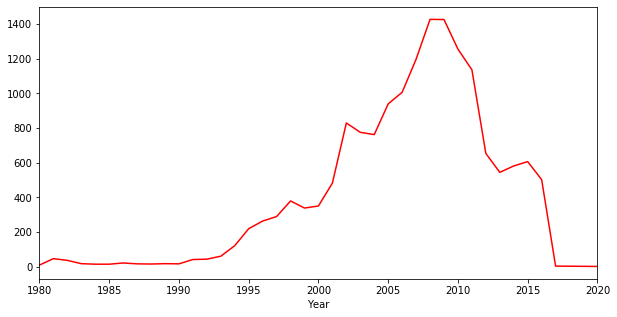

In [41]:
games.groupby('Year')['Name'].count().plot(figsize = (10,5), color = 'r')


На графике хорошо виден пик, который приходится на период 2008-2010 годов. Проверим так ли это

In [42]:
games['Year'].value_counts().head(10)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: Year, dtype: int64

### Действительно, наибольшее число игр было выпущено в период 2008-2009 года и с 2010 пошел спад

## Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод

Для того, чтобы построить распределение с отзывами и без, сделаю новый столбец в дата фрейм, в котором соберу User_Score и Critic_Score. Значения в новом столюце означают 1- есть отзыв, 0 - нет отзыва

In [43]:
games['Temp'] = np.where(((games['Critic_Score'] == 0) & (games['User_Score'] ==0)), '0', '1')

In [44]:
games.head()

Name Platform  Year         Genre  NA_players  \
0                Wii Sports      Wii  2006        Sports       41.36   
1         Super Mario Bros.      NES  1985      Platform       29.08   
2            Mario Kart Wii      Wii  2008        Racing       15.68   
3         Wii Sports Resort      Wii  2009        Sports       15.61   
4  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing       11.27   

   EU_players  RU_players  Other_players  Critic_Score  User_Score Rating  \
0       28.96        3.77           8.45          76.0    8.000000      E   
1        3.58        6.81           0.77           0.0    0.000000      E   
2       12.76        3.79           3.29          82.0    8.296875      E   
3       10.93        3.28           2.95          80.0    8.000000      E   
4        8.89       10.22           1.00           0.0    0.000000      E   

   Total_players Temp  
0          82.54    1  
1          40.24    0  
2          35.52    1  
3          32.77    1  
4          31.38    0

Построим график

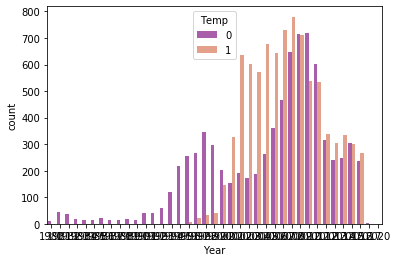

In [45]:
ax = sns.countplot(x='Year', data=games, hue='Temp', alpha= 0.75, palette='plasma')
sns.set(rc={'figure.figsize':(20,12)})

### Судя по графику, люди изначально не оставляли отзывы, потом количество отзывов стало стремительно расти и в период с 2001 по 2010  большинство игр имели отзывы,  но начиная с 2011 количество отзывов начало снижаться.

## Постройте график продаж по каждому году; 
сделайте вывод

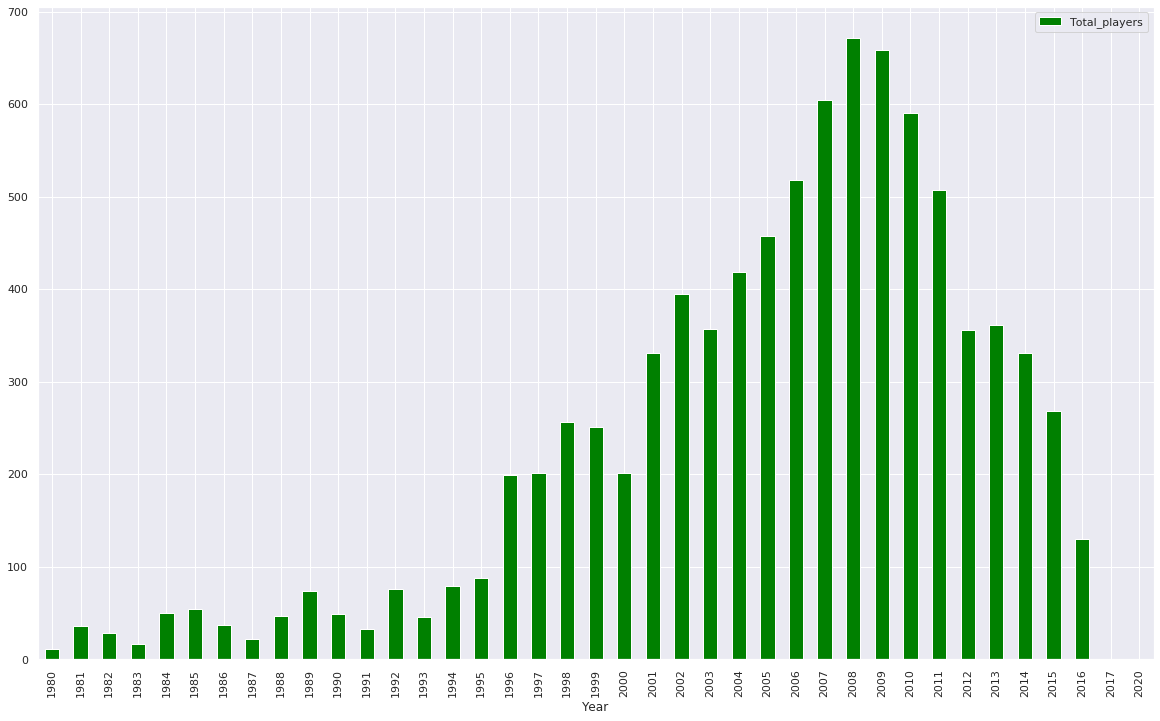

In [46]:
games.groupby('Year').agg({'Total_players':'sum'}).plot(kind='bar', color = 'green', grid = True) 

### На графике видно, что пик продаж пришелся на 2008-2009 год,после чего пошел спад.

## Постройте ящик с усами по глобальным продажам
опишите полученный результат

Построим ящик с усами по глобальным продажам

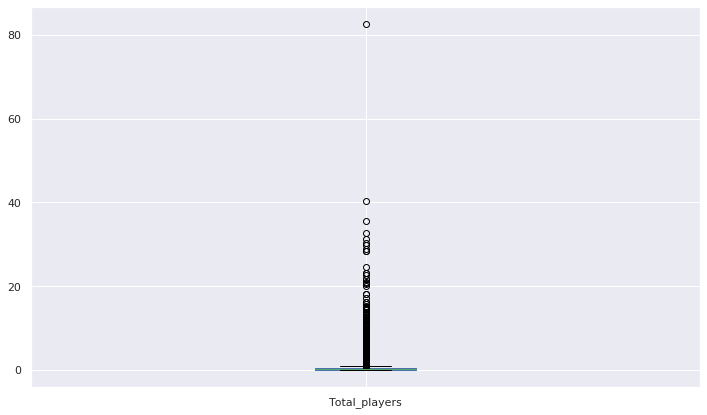

In [47]:
games.boxplot('Total_players', figsize=(12,7))


По графику видно, что есть выбросы, для большей наглядности, избавимся от них.


In [48]:
quant25 = games['Total_players'].quantile(0.25)
quant75 = games['Total_players'].quantile(0.75)


In [49]:
quant25


0.06

In [50]:
quant75

0.47000000000000003

In [51]:
interquartile_range = quant75 - quant25

# вычислим верхнюю границу данных
upper_threshold = quant75 + 1.5*interquartile_range


In [52]:
# убираем  выбросы
total_pl = games[games['Total_players'] < upper_threshold]

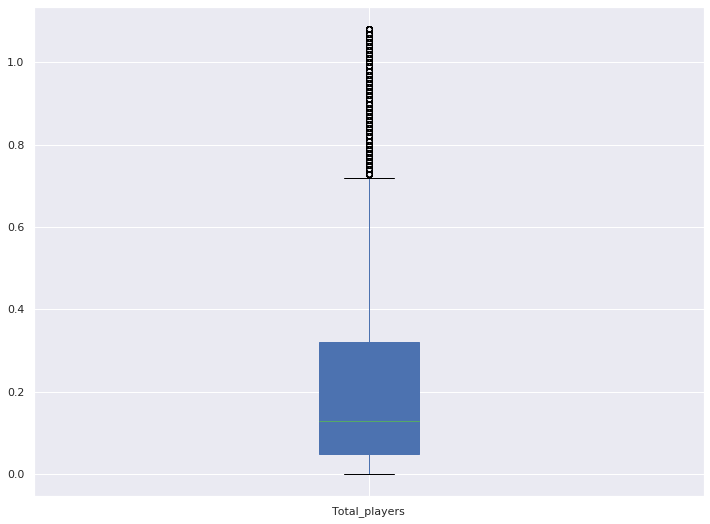

In [53]:
plot = total_pl.boxplot('Total_players', figsize=(12,9), patch_artist=True)


Посчитаем медианное значение продаж

In [54]:
total_pl.Total_players.median()*1000000  

130000.0

### Вывод: медианное значение объема продаж средней игры составляет 130 000 $

## Узнайте, на какой платформе было выпущено больше всего игр

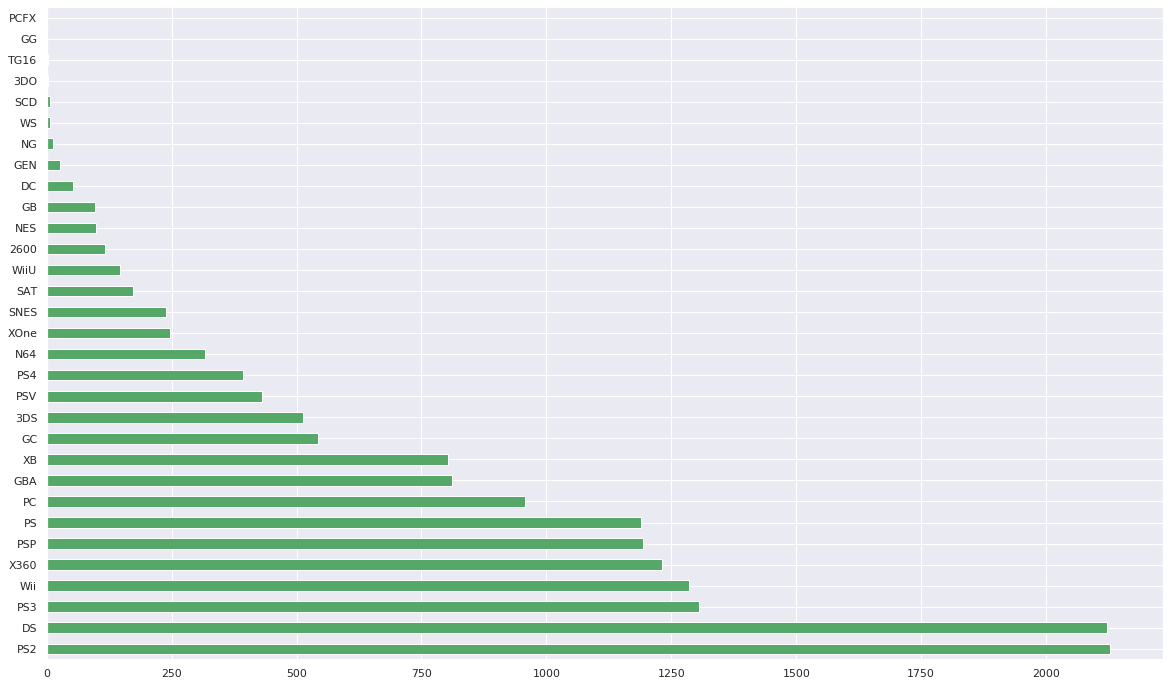

In [55]:
games['Platform'].value_counts().sort_values(ascending=False).plot(kind='barh', color = 'g', grid = True) 

In [56]:
games['Platform'].value_counts().sort_values(ascending=False).head()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
Name: Platform, dtype: int64

### Лидерство по платформам, на базе которых было выпущено больше всего игр, делят между собой PS2 и DS

## Определите, игр какого жанра больше всего

In [57]:
games['Genre'].value_counts().sort_values(ascending=False).head()

Action          3308
Sports          2306
Misc            1721
Role-Playing    1483
Shooter         1296
Name: Genre, dtype: int64

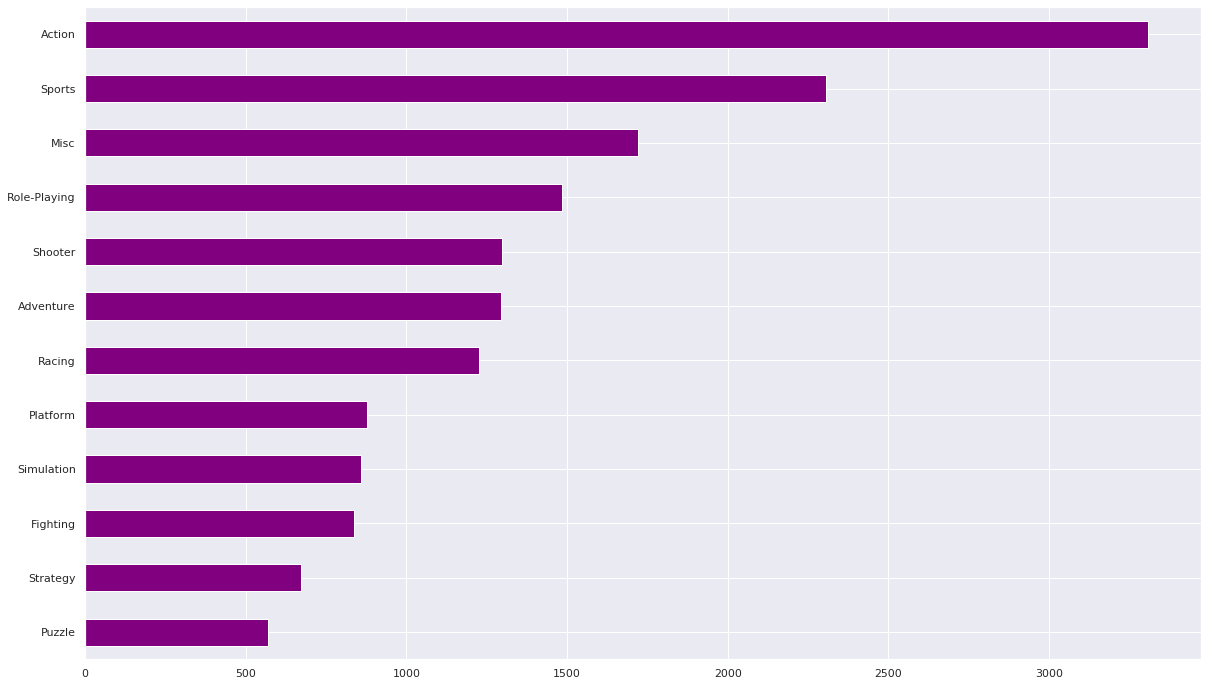

In [58]:
games['Genre'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = 'purple')

### Больше всего игр жанра Экшен, следом с большим отрывом идут спортивные игры

## Найдите игры с наибольшей и наименьшей оценкой от пользователей и Найдите игры с наибольшей и наименьшей оценкой от критиков

Отсортируем наши данные и посмотрим первые и последние 10 значений с наименьшей и с наибольшей оценкой.

In [59]:
games.sort_values('Critic_Score').head(10)[['Name','Critic_Score']]

Name  Critic_Score
16718                                Winning Post 8 2016           0.0
11692  Katekyoo Hitman Reborn! DS: Flame Rumble Kaien...           0.0
5972                           J-League Victory Goal '96           0.0
11695                    Ni Hao, Kai-lan: Super Game Day           0.0
11698                         Pro Yakyuu Famista DS 2010           0.0
11699  Katekyoo Hitman Reborn! DS: Flame Rumble Hyper...           0.0
11700                                    Captain Tsubasa           0.0
5967                            Rabbids: Alive & Kicking           0.0
5965                             Invizimals: Shadow Zone           0.0
5964         Jikkyou Powerful Pro Yakyuu 2000 Kaimakuban           0.0

In [60]:
games.sort_values('User_Score').head(10)[['Name','User_Score']]

Name  User_Score
16718                         Winning Post 8 2016         0.0
7358                LEGO Ninjago: Shadow of Ronin         0.0
13089                                   Downforce         0.0
13088  Armored Core: Formula Front Extreme Battle         0.0
7364            Naruto: Clash of Ninja (JP sales)         0.0
13086                     Starry ? Sky: In Spring         0.0
7366                         SingStar Pop Edition         0.0
13085                      DokiDoki Majo Shinpan!         0.0
7369                            NOëL: NOT DiGITAL         0.0
7370                Dragon Ball Z Hyper Dimension         0.0

In [61]:
games.sort_values('Critic_Score').tail(10)[['Name','Critic_Score']]

Name  Critic_Score
129       Halo: Combat Evolved          97.0
165         Grand Theft Auto V          97.0
23          Grand Theft Auto V          97.0
517              Metroid Prime          97.0
1877                   NFL 2K1          97.0
249   Tony Hawk's Pro Skater 3          97.0
227   Tony Hawk's Pro Skater 2          98.0
51         Grand Theft Auto IV          98.0
57         Grand Theft Auto IV          98.0
5350               SoulCalibur          98.0

In [62]:
games.sort_values('User_Score').tail(10)[['Name','User_Score']]

Name  User_Score
712      Paper Mario: The Thousand-Year Door    9.398438
3105       Advance Wars 2: Black Hole Rising    9.398438
16550            Wade Hixton's Counter Punch    9.500000
10106                      Cory in the House    9.500000
1645                Golden Sun: The Lost Age    9.500000
16631                          Karnaaj Rally    9.500000
5920                     MLB SlugFest Loaded    9.500000
3417   Harvest Moon: Friends of Mineral Town    9.601562
8976         Boktai: The Sun is in Your Hand    9.601562
14414                     Breath of Fire III    9.703125

## Оцените корреляцию между оценками критиков и пользовательскими оценками.

Посмотрим связь между оценками и построим парный график

In [63]:
games.corr()[['User_Score', 'Critic_Score']].sort_values(by = 'Critic_Score', ascending = False).style.background_gradient()

In [64]:
games.query('User_Score!= 0 & Critic_Score != 0')[['User_Score','Critic_Score']].corr().style.background_gradient()

Я считаю связь без нулевых оценок более репрезентативной, поэтому построю график отношений с этим условием

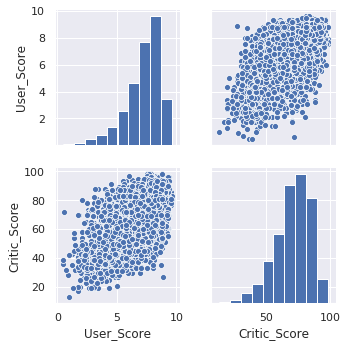

In [65]:
sns.pairplot(games.query('User_Score!= 0 & Critic_Score != 0')[['User_Score','Critic_Score']], palette = 'Set1')

### Мы видим сильную линейную связь между оценками пользователей и оценками критиков, как при учете нулевых значений, так и без них (0,82 и 0,58 соответственно).

# Шаг 4. Составьте портрет пользователя для каждого региона <a class="anchor" id="4"></a>
* Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
    * топ-5 предпочтительных жанров
    * в какие года пользователи были наиболее активны (больше всего покупали игры)
    * топ-5 предпочтительных платформ
    * какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

### Посмотрим TOP-5 для европейских игроков 

In [66]:
games.groupby('Genre')['EU_players'].sum().sort_values(ascending=False).head()

Genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: EU_players, dtype: float64

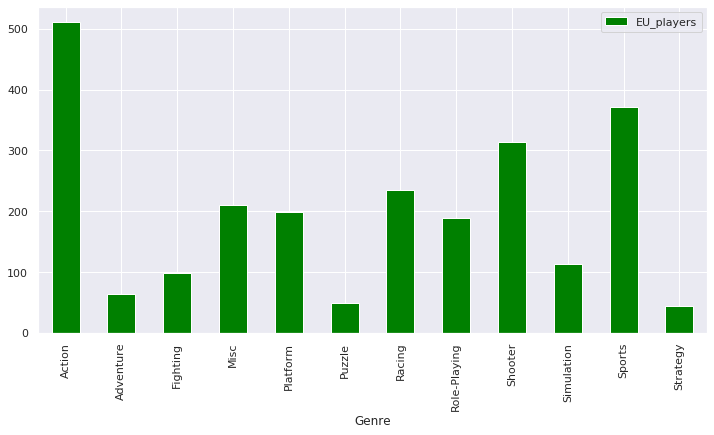

In [67]:
games.groupby('Genre').agg({'EU_players':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6)) 

В Европе предпочитают игры в жанре экшен

### TOP-5 Russia

In [68]:
games.groupby('Genre')['RU_players'].sum().sort_values(ascending=False).head()

Genre
Role-Playing    353.44
Action          160.15
Sports          134.93
Platform        130.71
Misc            107.02
Name: RU_players, dtype: float64

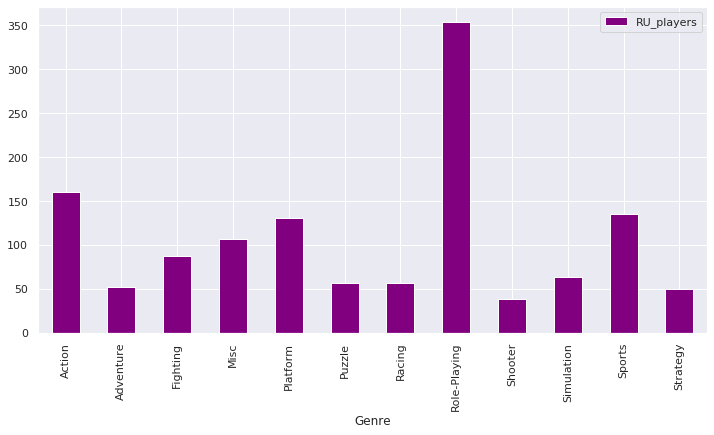

In [69]:
games.groupby('Genre').agg({'RU_players':'sum'}).plot(kind='bar', color = 'purple', grid = True, figsize = (12,6)) 

В России больше играют в ролевые игры

### TOP-5 для Америки

In [70]:
games.groupby('Genre')['NA_players'].sum().sort_values(ascending=False).head()

Genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: NA_players, dtype: float64

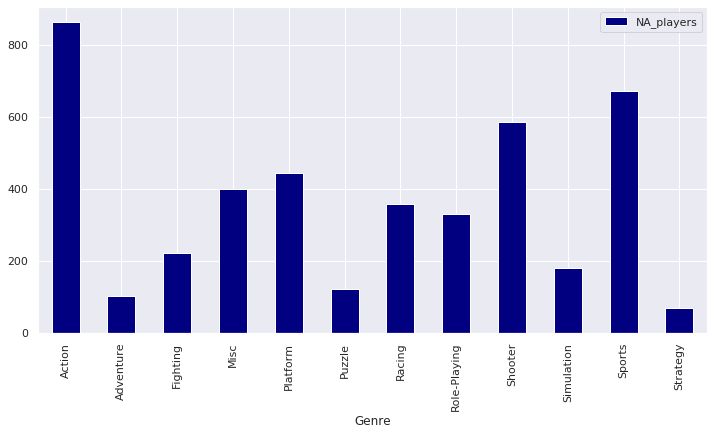

In [71]:
games.groupby('Genre').agg({'NA_players':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6)) 

В Америке играют чаще в экшен

## Посмотрим инофрмацию по продажам в Европе, России и Америке

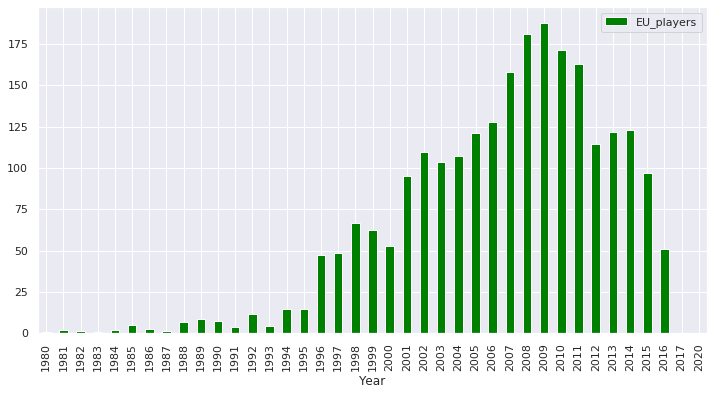

In [72]:
games.groupby('Year').agg({'EU_players':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6)) 

Самый проадваемый год в Европе был 2009

### Для России

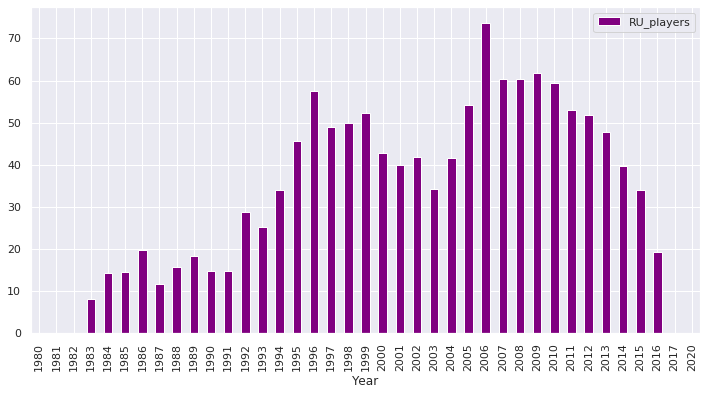

In [73]:
games.groupby('Year').agg({'RU_players':'sum'}).plot(kind='bar', color = 'purple', grid = True, figsize = (12,6)) 

Самый продаваемый год в России был 2006

### Для Америки

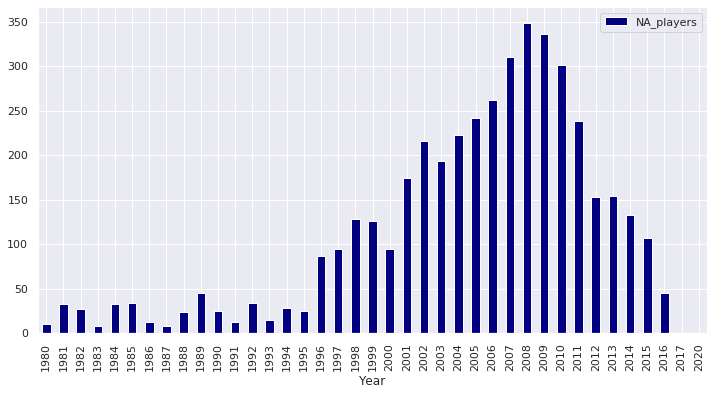

In [74]:
games.groupby('Year').agg({'NA_players':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6)) 

Самый продаваемый год в Америке был 2008

## Посмотрим топ-5 предпочтительных платформ

### Для Европы

In [75]:
games.groupby('Platform')['EU_players'].sum().sort_values(ascending=False).head()

Platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: EU_players, dtype: float64

 Самая популярная платформа в Европе - это PS2

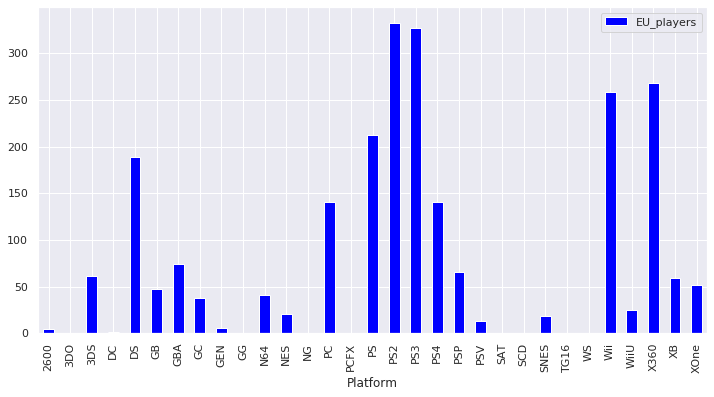

In [76]:
games.groupby('Platform').agg({'EU_players':'sum'}).plot(kind='bar', color = 'blue', grid = True, figsize = (12,6)) 

### Для России

In [77]:
games.groupby('Platform')['RU_players'].sum().sort_values(ascending=False).head()

Platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: RU_players, dtype: float64

Самая популярная платформа в России - это DS

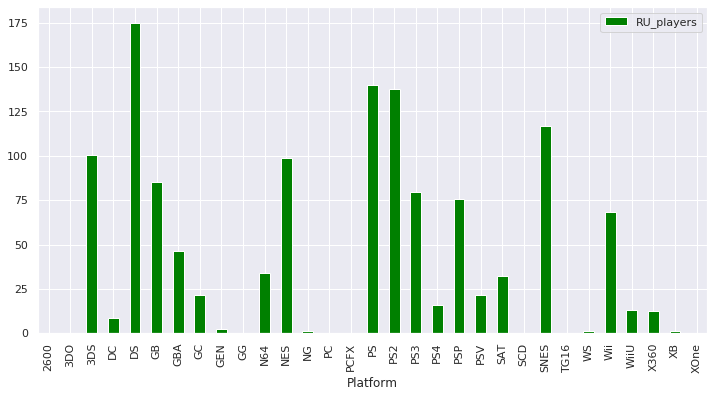

In [78]:
games.groupby('Platform').agg({'RU_players':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6)) 

### Для Америки

In [79]:
games.groupby('Platform')['NA_players'].sum().sort_values(ascending=False).head()

Platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.58
Name: NA_players, dtype: float64

Самая популярная платформа в Америке это X360

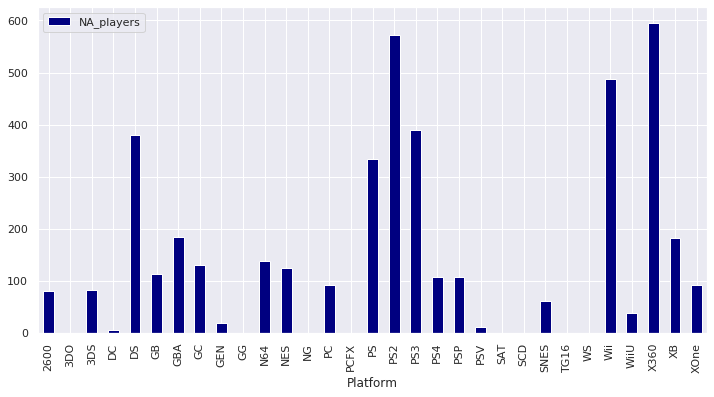

In [80]:
games.groupby('Platform').agg({'NA_players':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6))

## Посмотрим какой рейтинг ESRB встречается чаще всего 

В Европе

In [81]:
games.groupby('Rating')['EU_players'].sum().sort_values(ascending=False).head()

Rating
E       1313.52
M        480.00
T        421.79
E10+     183.35
AO         0.61
Name: EU_players, dtype: float64

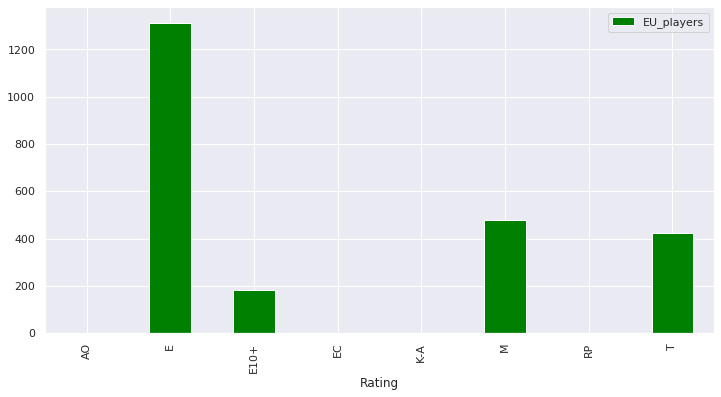

In [82]:
games.groupby('Rating').agg({'EU_players':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6))

В России

In [83]:
games.groupby('Rating')['RU_players'].sum().sort_values(ascending=False).head()

Rating
E       1034.76
T        150.70
M         63.58
E10+      40.20
K-A        1.46
Name: RU_players, dtype: float64

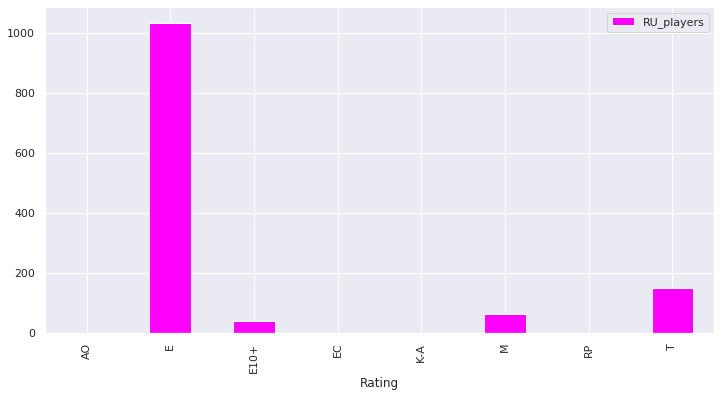

In [84]:
games.groupby('Rating').agg({'RU_players':'sum'}).plot(kind='bar', color = 'magenta', grid = True, figsize = (12,6))

В Америке

In [85]:
games.groupby('Rating')['NA_players'].sum().sort_values(ascending=False).head()

Rating
E       2500.35
T        747.60
M        742.89
E10+     345.50
K-A        2.56
Name: NA_players, dtype: float64

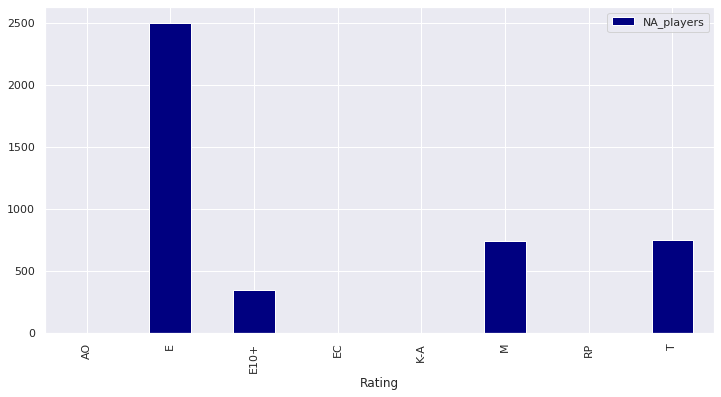

In [86]:
games.groupby('Rating').agg({'NA_players':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6))

### Самый популярный рейтинг во всех странах - это Е

# Шаг 5. Проверьте гипотезы <a class="anchor" id="5"></a>
* средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
* средний пользовательский рейтинг жанров Action и Sports различается.


Проверим гипотезу, что средний пользовательский рейтинг платформ PS2 и PS3 одинаковый

- H0: mean(user_score for PS2 platform) = mean(user_score for PS3 platform)
- H1: mean(user_score for PS2 platform) != mean(user_score for PS3 platform)
- alpha = .05¶

In [87]:
from scipy import stats as st

def test(df1, df2):
    alpha = .05
    results = st.ttest_ind(games[(games['Platform']=='PS2') & (games['User_Score'] != 0)]['User_Score'], games[(games['Platform']=='PS3') & (games['User_Score'] != 0)]['User_Score'], equal_var = False)
    if (results.pvalue < alpha):
        return(print("Отвергаем нулевую гипотезу" ))
    else:
        return(print("Не получилось отвергнуть нулевую гипотезу" ))
    

In [88]:
PS2 = games[games['Platform']=='PS2']['User_Score']
PS3 = games[games['Platform']=='PS3']['User_Score']
test(PS2,PS3)

Отвергаем нулевую гипотезу


In [89]:
games[(games['User_Score']!=0) & (games['Platform'].isin(['PS2', 'PS3']))]\
.groupby('Platform')['User_Score'].mean()

Platform
PS2    7.62500
PS3    6.71875
Name: User_Score, dtype: float16

Средний (user_score) для PS2 = 7.63, а для PS3 = 6.72

Проверим гипотезу, что средний пользовательский рейтинг жанров Action и Sports различается.

In [90]:
def test2(df1, df2):
    alpha = .05
    results = st.ttest_ind(games[(games['Genre']=='Action') & (games['User_Score'] != 0)]['User_Score'], games[(games['Genre']=='Sports') & (games['User_Score'] != 0)]['User_Score'], equal_var = False)
    if (results.pvalue < alpha):
        return(print("Отвергаем нулевую гипотезу" ))
    else:
        return(print("Не получилось отвергнуть нулевую гипотезу" ))

In [91]:
Action = games[games['Genre']=='Action']['User_Score']
Sports = games[games['Genre']=='Sports']['User_Score']
test2(Action,Sports)

Не получилось отвергнуть нулевую гипотезу


In [92]:
games[(games['User_Score']!=0) & (games['Genre'].isin(['Action', 'Sports']))]\
.groupby('Genre')['User_Score'].mean()

Genre
Action    7.058594
Sports    6.953125
Name: User_Score, dtype: float16

Средний (user_score) для Action 7.06, а для Sports 6.95

# ИТОГ ПРОЕКТА <a class="anchor" id="6"></a>

Во время работы над проектом был проведен предварительный анализ данных, заменены названия столбцов, переменные были приведены к нужным типам, было посчитано количество продаж во всех регионах и записано в отдельный столбец. Были обработаны и заменены пропуски. Проведен исследовательский анализ данных, в ходе которого было определено распределение по годам релиза, по продажам, по платформам и жанрам, были найдены игры с наибольшей и с наименьшей оценкой у критиков. Мы составили портрет игроков из России, Европы и Америки. А также проверили гипотезы. 


* [В начало проекта](#7)